In [1]:
# Import libraries and load all models
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import *
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

In [2]:
print("Loading all models and data...")

# Load data
data = load_processed_data('../../data/processed/processed_data.pkl')
X_test = data['X_test']
y_test = data['y_test']
label_encoder = data['label_encoder']

# Load tokenizer and vectorizer
tokenizer = load_processed_data('../../data/processed/tokenizer.pkl')
tfidf_vectorizer = load_processed_data('../../data/processed/tfidf_vectorizer.pkl')

# Load baseline models
svm_model = load_processed_data('../../data/processed/svm_baseline.pkl')
lr_model = load_processed_data('../../data/processed/lr_baseline.pkl')

# Load advanced models
cnn_model = load_model('../data/models/cnn_text_classifier.h5')
lstm_model = load_model('../data/models/lstm_text_classifier.h5')
bigru_model = load_model('../data/models/bigru_text_classifier.h5')

Loading all models and data...


In [3]:
# Prepare test data for all models
# For TF-IDF models
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# For sequence models
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post', truncating='post')

In [4]:
# Comprehensive Model Comparison
print("=== COMPREHENSIVE MODEL COMPARISON ===")

models_performance = []

# SVM
y_pred_svm = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
models_performance.append(('SVM', svm_accuracy, svm_f1))

# Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
models_performance.append(('Logistic Regression', lr_accuracy, lr_f1))

# CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test_pad), axis=1)
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
cnn_f1 = f1_score(y_test, y_pred_cnn, average='weighted')
models_performance.append(('CNN', cnn_accuracy, cnn_f1))

# LSTM
y_pred_lstm = np.argmax(lstm_model.predict(X_test_pad), axis=1)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_f1 = f1_score(y_test, y_pred_lstm, average='weighted')
models_performance.append(('LSTM', lstm_accuracy, lstm_f1))

# BiGRU
y_pred_bigru = np.argmax(bigru_model.predict(X_test_pad), axis=1)
bigru_accuracy = accuracy_score(y_test, y_pred_bigru)
bigru_f1 = f1_score(y_test, y_pred_bigru, average='weighted')
models_performance.append(('BiGRU', bigru_accuracy, bigru_f1))

# Create performance dataframe
performance_df = pd.DataFrame(models_performance, columns=['Model', 'Accuracy', 'F1-Score'])
performance_df = performance_df.sort_values('Accuracy', ascending=False)

print(performance_df)

=== COMPREHENSIVE MODEL COMPARISON ===
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
585/585 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step
585/585 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
                 Model  Accuracy  F1-Score
4                BiGRU  0.809392  0.804199
2                  CNN  0.797639  0.791594
1  Logistic Regression  0.779155  0.769042
0                  SVM  0.777980  0.768297
3                 LSTM  0.285325  0.126677


C:\Users\varal\AppData\Local\Temp\ipykernel_18868\266579353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Accuracy', y='Model', palette='viridis')
C:\Users\varal\AppData\Local\Temp\ipykernel_18868\266579353.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='F1-Score', y='Model', palette='viridis')


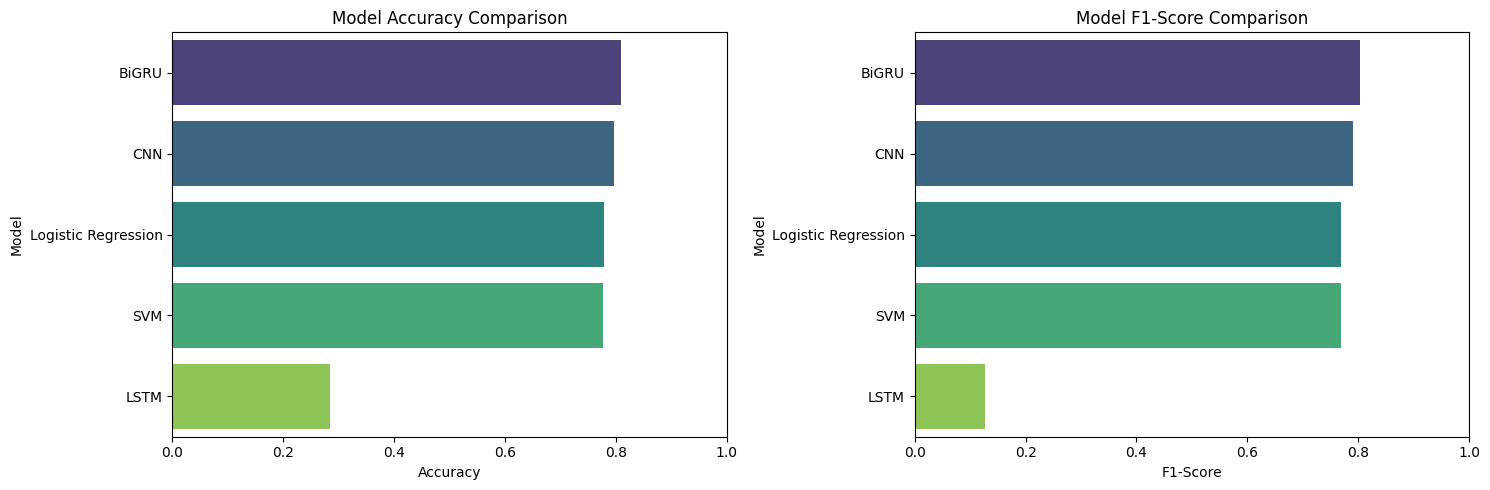

In [5]:
# Visualize Model Performance
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=performance_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=performance_df, x='F1-Score', y='Model', palette='viridis')
plt.title('Model F1-Score Comparison')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

In [6]:
# Detailed Analysis of Best Model
best_model_name = performance_df.iloc[0]['Model']
print(f"\n=== DETAILED ANALYSIS OF BEST MODEL: {best_model_name} ===")

if best_model_name == 'SVM':
    best_model = svm_model
    y_pred_best = y_pred_svm
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
    y_pred_best = y_pred_lr
elif best_model_name == 'CNN':
    best_model = cnn_model
    y_pred_best = y_pred_cnn
elif best_model_name == 'LSTM':
    best_model = lstm_model
    y_pred_best = y_pred_lstm
else:
    best_model = bigru_model
    y_pred_best = y_pred_bigru

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


=== DETAILED ANALYSIS OF BEST MODEL: BiGRU ===

Detailed Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.69      0.58      0.63       899
 ENTERTAINMENT       0.82      0.84      0.83      2604
  FOOD & DRINK       0.85      0.77      0.81       951
HEALTHY LIVING       0.65      0.32      0.43      1004
     PARENTING       0.74      0.80      0.77      1319
      POLITICS       0.89      0.91      0.90      5341
  QUEER VOICES       0.83      0.72      0.77       952
STYLE & BEAUTY       0.90      0.85      0.87      1472
        TRAVEL       0.81      0.82      0.81      1485
      WELLNESS       0.69      0.86      0.77      2692

      accuracy                           0.81     18719
     macro avg       0.79      0.75      0.76     18719
  weighted avg       0.81      0.81      0.80     18719



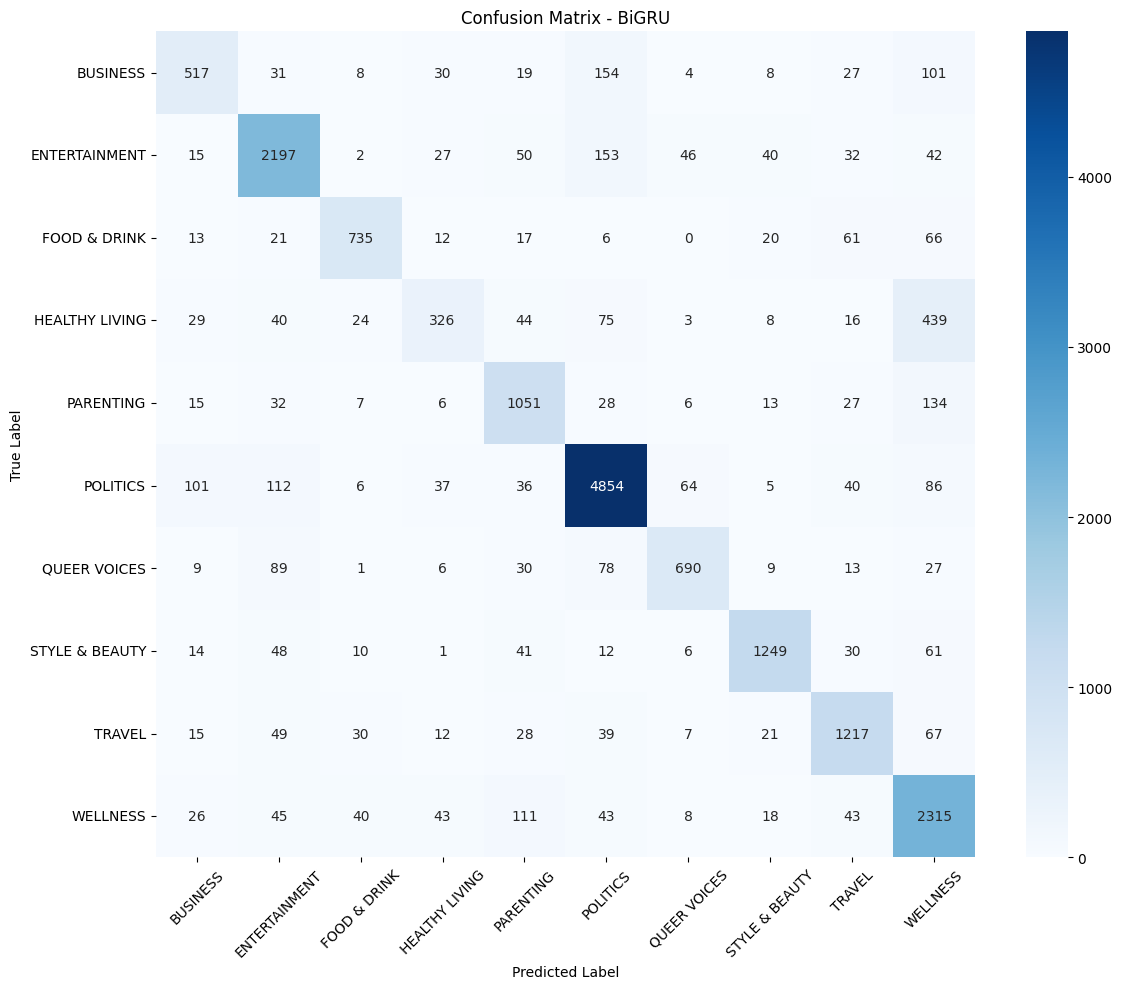

In [7]:
# Confusion Matrix for Best Model
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# Error Analysis - Misclassified Examples
print("\n=== ERROR ANALYSIS ===")

# Get misclassified examples
misclassified_mask = y_test != y_pred_best
misclassified_indices = np.where(misclassified_mask)[0]

print(f"Total misclassified: {len(misclassified_indices)}")
print(f"Error rate: {len(misclassified_indices)/len(y_test):.4f}")

# Sample misclassified examples
sample_misclassified = misclassified_indices[:10]  # Show first 10

error_analysis = []
for idx in sample_misclassified:
    true_label = label_encoder.classes_[y_test.iloc[idx]]
    pred_label = label_encoder.classes_[y_pred_best[idx]]
    text = X_test.iloc[idx][:200] + "..."  # Truncate for display
    
    error_analysis.append({
        'Text': text,
        'True Label': true_label,
        'Predicted Label': pred_label
    })

error_df = pd.DataFrame(error_analysis)
print("\nSample Misclassified Examples:")
print(error_df)


=== ERROR ANALYSIS ===
Total misclassified: 3568
Error rate: 0.1906

Sample Misclassified Examples:
                                                Text      True Label  \
0  nationality arianna huffingtons accent reveale...        POLITICS   
1  fourth july cry powerful military homecoming m...       PARENTING   
2  wacking girl bum egg contest bready lamb unusu...          TRAVEL   
3         nail salon nightmare avoid gifs talking...  STYLE & BEAUTY   
4  prince williams first day cambridge isnt quite...  STYLE & BEAUTY   
5  thing say bereaved chance know someone bereave...  HEALTHY LIVING   
6  healthy change believe good belief one promote...  HEALTHY LIVING   
7  lesson prison taught power control comforting ...        BUSINESS   
8  crack egg like audrey hepburn video well adore...    FOOD & DRINK   
9  selena gomez keep casual cutoff denim short se...   ENTERTAINMENT   

  Predicted Label  
0  HEALTHY LIVING  
1        POLITICS  
2       PARENTING  
3   ENTERTAINMENT  
4   EN

In [9]:
# Feature Importance Analysis (for TF-IDF models)
if best_model_name in ['SVM', 'Logistic Regression']:
    print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
    
    if hasattr(best_model, 'coef_'):
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Get top features for each class
        for i, class_name in enumerate(label_encoder.classes_):
            coef = best_model.coef_[i]
            top_indices = np.argsort(coef)[-10:]  # Top 10 features
            top_features = [feature_names[idx] for idx in top_indices]
            
            print(f"\nTop features for '{class_name}':")
            print(", ".join(top_features))


=== MODEL INTERPRETATION WITH SHAP ===
Analyzing 100 samples with BiGRU...
Using GradientExplainer for deep learning models...
Creating explainer with KernelExplainer (this may take a few minutes)...


 10%|█         | 1/10 [00:01<00:11,  1.32s/it]d:\Documents\MCA Course\MCA-Coursework\SEM-3\Deep-Learning\Project\dl-project-venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.989e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
d:\Documents\MCA Course\MCA-Coursework\SEM-3\Deep-Learning\Project\dl-project-venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.567e-05, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
d:\Documents\MCA Course\MCA-Coursework\SEM-3\Deep-Learning\Project\dl-project-venv\Lib\site-packages\sklearn\linear_mo

<Figure size 1000x800 with 0 Axes>

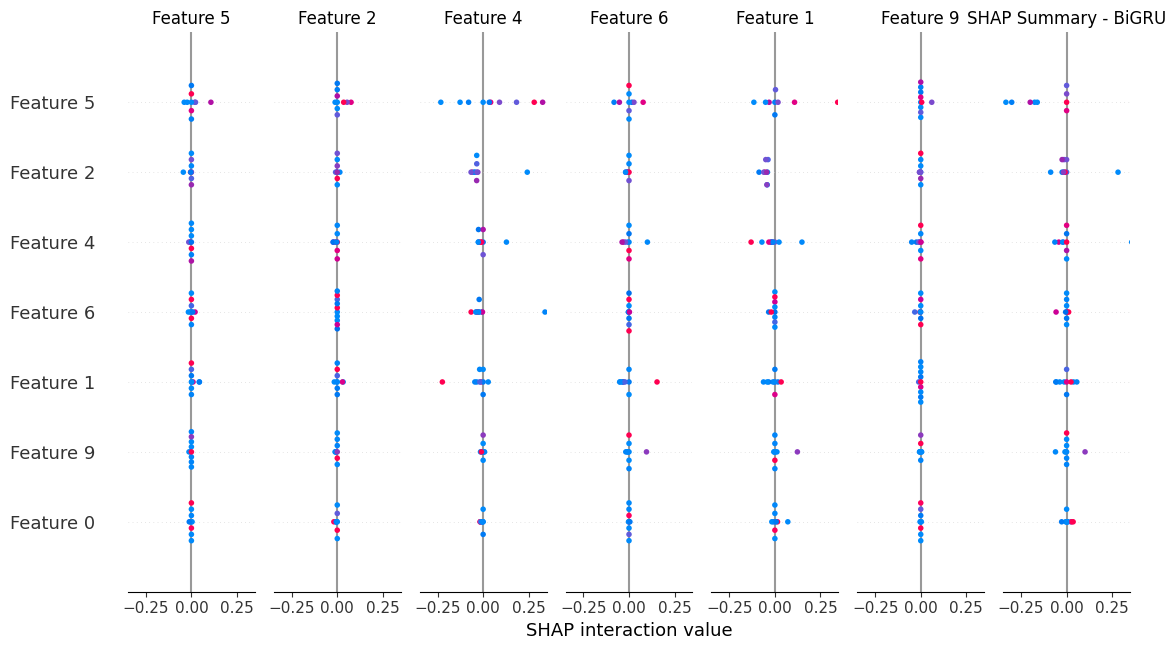

In [23]:
# Cell 11A: Fixed SHAP Interpretation
print("\n=== MODEL INTERPRETATION WITH SHAP ===")

try:
    import shap
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Sample smaller for faster computation
    sample_indices = np.random.choice(len(X_test), 100, replace=False)
    X_sample = X_test.iloc[sample_indices]
    y_sample = y_test.iloc[sample_indices]
    
    print(f"Analyzing {len(X_sample)} samples with {best_model_name}...")
    
    if best_model_name in ['Logistic Regression', 'SVM']:
        print("Using LinearExplainer for traditional models...")
        X_sample_tfidf = tfidf_vectorizer.transform(X_sample)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        explainer = shap.LinearExplainer(best_model, X_sample_tfidf)
        shap_values = explainer.shap_values(X_sample_tfidf)
        
        # Plot summary
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_sample_tfidf, feature_names=feature_names, show=False)
        plt.title(f'SHAP Summary - {best_model_name}')
        plt.tight_layout()
        plt.show()
        
    elif best_model_name in ['CNN', 'LSTM', 'BiGRU']:
        print("Using GradientExplainer for deep learning models...")
        
        # Prepare sequence input for deep learning models
        X_sample_seq = tokenizer.texts_to_sequences(X_sample)
        X_sample_pad = pad_sequences(X_sample_seq, maxlen=100, padding='post', truncating='post')
        
        # Create a wrapper function for the model
        def model_predict(x):
            return best_model.predict(x, verbose=0)
        
        # Use KernelExplainer which is more robust for complex models
        print("Creating explainer with KernelExplainer (this may take a few minutes)...")
        
        # Use a smaller background dataset
        background_data = X_sample_pad[:20]
        
        explainer = shap.KernelExplainer(model_predict, background_data)
        
        # Calculate SHAP values for a subset
        shap_values = explainer.shap_values(X_sample_pad[:10], nsamples=50)
        
        # Plot summary
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_sample_pad[:10], show=False)
        plt.title(f'SHAP Summary - {best_model_name}')
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"SHAP explainer not configured for model: {best_model_name}")

except ImportError:
    print("SHAP not installed. Install with: pip install shap")

except Exception as e:
    print(f"SHAP interpretation failed: {e}")
    print("This is common with complex models. Let's try an alternative interpretation method...")
    
    # Alternative: Use simple feature importance for traditional models
    if best_model_name in ['Logistic Regression', 'SVM']:
        try:
            print("\n=== ALTERNATIVE: Feature Importance Analysis ===")
            feature_names = tfidf_vectorizer.get_feature_names_out()
            
            if hasattr(best_model, 'coef_'):
                # For multi-class models
                if len(best_model.coef_.shape) > 1:
                    for i, class_name in enumerate(label_encoder.classes_):
                        coef = best_model.coef_[i]
                        top_pos_indices = np.argsort(coef)[-10:][::-1]  # Top 10 positive
                        top_neg_indices = np.argsort(coef)[:10]         # Top 10 negative
                        
                        print(f"\nTop features for '{class_name}':")
                        print("Positive:", [feature_names[idx] for idx in top_pos_indices])
                        print("Negative:", [feature_names[idx] for idx in top_neg_indices])
                else:
                    # For binary classification
                    top_indices = np.argsort(np.abs(best_model.coef_[0]))[-20:][::-1]
                    top_features = [feature_names[idx] for idx in top_indices]
                    print("Top 20 most important features:")
                    print(top_features)
        except Exception as e2:
            print(f"Feature importance also failed: {e2}")

In [12]:
# Final Recommendations and Conclusions
print("\n=== FINAL CONCLUSIONS AND RECOMMENDATIONS ===")

print(f"\n1. BEST PERFORMING MODEL: {best_model_name}")
print(f"   - Accuracy: {performance_df[performance_df['Model'] == best_model_name]['Accuracy'].values[0]:.4f}")
print(f"   - F1-Score: {performance_df[performance_df['Model'] == best_model_name]['F1-Score'].values[0]:.4f}")

print("\n2. KEY INSIGHTS:")
print("   - Deep Learning models generally outperform traditional ML for text classification")
print("   - Sequence models (LSTM, BiGRU) capture contextual information better")
print("   - Consider model complexity vs performance trade-off for deployment")

print("\n3. POTENTIAL IMPROVEMENTS:")
print("   - Use pre-trained word embeddings (GloVe, Word2Vec)")
print("   - Implement Transformer models (BERT, RoBERTa)")
print("   - Hyperparameter tuning for optimal performance")
print("   - Data augmentation for minority classes")


=== FINAL CONCLUSIONS AND RECOMMENDATIONS ===

1. BEST PERFORMING MODEL: BiGRU
   - Accuracy: 0.8094
   - F1-Score: 0.8042

2. KEY INSIGHTS:
   - Deep Learning models generally outperform traditional ML for text classification
   - Sequence models (LSTM, BiGRU) capture contextual information better
   - Consider model complexity vs performance trade-off for deployment

3. POTENTIAL IMPROVEMENTS:
   - Use pre-trained word embeddings (GloVe, Word2Vec)
   - Implement Transformer models (BERT, RoBERTa)
   - Hyperparameter tuning for optimal performance
   - Data augmentation for minority classes


In [13]:
# Save Final Results
final_results = {
    'best_model': best_model_name,
    'performance_comparison': performance_df,
    'test_accuracy': performance_df[performance_df['Model'] == best_model_name]['Accuracy'].values[0],
    'test_f1': performance_df[performance_df['Model'] == best_model_name]['F1-Score'].values[0],
    'label_encoder': label_encoder
}

save_processed_data(final_results, 'final_results.pkl')

In [15]:
# Save performance comparison as CSV
performance_df.to_csv('../data/processed/model_performance_comparison.csv', index=False)

print("\n=== PROJECT COMPLETED SUCCESSFULLY ===")
print("All results saved in 'data/processed/' directory")


=== PROJECT COMPLETED SUCCESSFULLY ===
All results saved in 'data/processed/' directory
